In [1]:
from src.utilities.fin_shape_utils import fit_fin_hull, upsample_fin_point_cloud, plot_mesh
from src.utilities.fin_class_def import FinData
from src.utilities.functions import path_leaf
import pandas as pd 
import os
import numpy as np
import glob2 as glob

import plotly.express as px
import plotly.graph_objects as go

### Load the fin object

In [2]:
# root = "/Users/nick/Cole Trapnell's Lab Dropbox/Nick Lammers/Nick/pecfin_dynamics/"
root = "/media/nick/hdd02/Cole Trapnell's Lab Dropbox/Nick Lammers/Nick/pecfin_dynamics/"
fin_object_path = os.path.join(root, "point_cloud_data", "fin_objects", "")
fin_object_list = sorted(glob.glob(fin_object_path + "*.pkl"))

file_ind01 = 146
seg_type = "tissue_only_best_model_tissue"
fp01 = fin_object_list[file_ind01]
point_prefix01 = path_leaf(fp01).replace("_fin_object.pkl", "")
print(point_prefix01)

fin_object = FinData(data_root=root, name=point_prefix01, tissue_seg_model=seg_type)

20240711_02_well0053_time0000


### Run code to extract nucleus boundaries

In [3]:
fin_df_upsamp = upsample_fin_point_cloud(fin_object, sample_res_um=0.5, root=root, points_per_nucleus=100)
fin_df_upsamp.head()

/home/nick/projects/pecfin_dynamics/src/utilities/fin_shape_utils.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fin_df["nn_scale_um"] = nn_dist_mean
100%|██████████| 597/597 [00:01<00:00, 593.41it/s]


nucleus_id          X          Y           Z         XP         YP  \
0          2  15.049199  48.925053  230.963149  51.678467 -65.154993   
1          2  23.069730  36.909026  212.787999  47.314641 -79.292070   
2          2  20.785015  35.851256  205.891388  49.842671 -79.846060   
3          2   7.082693  41.070079  223.780284  61.514969 -70.722570   
4          2  19.005265  42.971899  230.938983  49.477995 -71.954710   

          ZP  
0 -86.429771  
1 -68.537037  
2 -61.666505  
3 -79.429437  
4 -86.543134

### Plot fin points

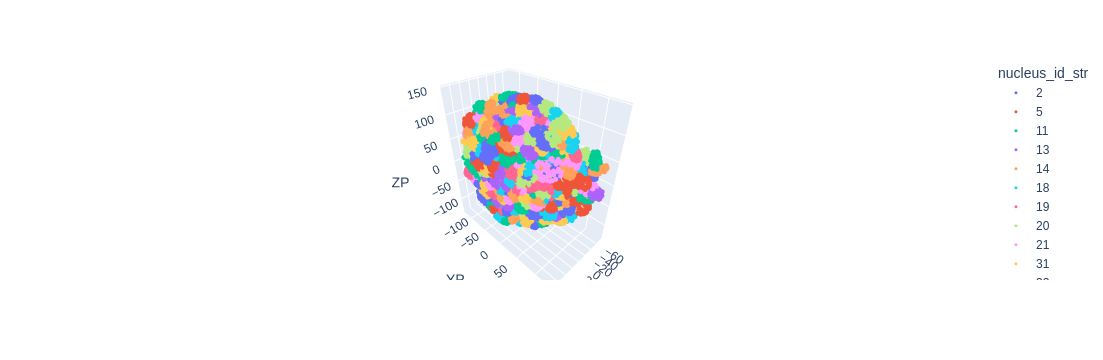

In [4]:

fin_df_upsamp["nucleus_id_str"] = fin_df_upsamp["nucleus_id"].astype(str)

fig = px.scatter_3d(fin_df_upsamp, x="XP", y="YP", z="ZP", color="nucleus_id_str") #.loc[fin_df_new["nucleus_id"]==lb, :]
fig.update_traces(marker=dict(size=3))

fig.update_layout(
             scene=dict(
                 aspectmode='data'
                 ))

fig.show()

### Fit a 3D surface mesh

In [20]:
fin_points = fin_df_upsamp[["XP", "YP", "ZP"]].to_numpy()
fin_hull, raw_hull, wt_flag = fit_fin_hull(fin_points, n_faces=1024)

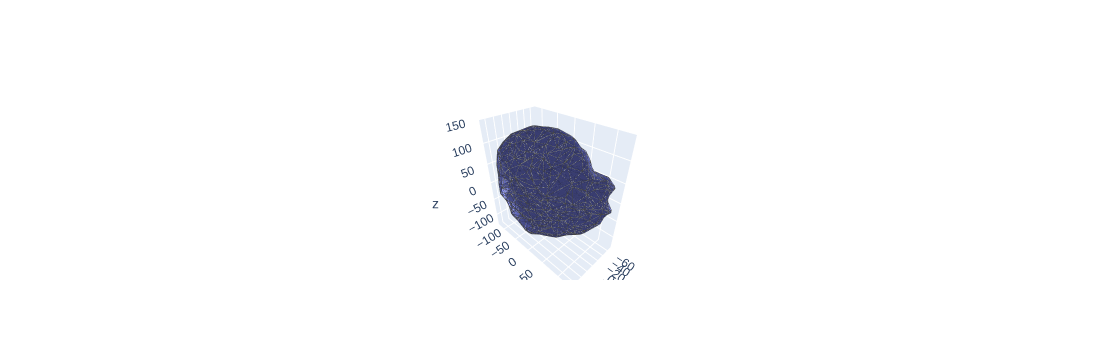

In [22]:
fig, _, _ = plot_mesh(fin_hull, surf_alpha=0.7)
fig.show()

### What about flowshape?

In [1]:
import flowshape as fs
import igl
import numpy as np
import meshplot as mp

In [2]:
# v, f = fin_hull.vertices.copy(), fin_hull.faces.copy()
v, f = igl.read_triangle_mesh("/home/nick/projects/flowshape/demo/ABal.obj")
mp.plot(v, f, shading = {"wireframe":True})

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(16.141762…

### Run Spherical mapping

In [3]:
# normalize the scaling of the mesh
v = fs.normalize(v)

# run the spherical mapping flow and mobius centering
sv = fs.sphere_map(v, f)

# Now we have a spherical mesh
mp.plot(sv, f, shading = {"wireframe":True})

/home/nick/miniconda3/envs/fin-shape-env/lib/python3.10/site-packages/flowshape/flow.py:86: MatrixRankWarning: Matrix is exactly singular
  verts = spsolve(S, b)


ZeroDivisionError: Weights sum to zero, can't be normalized

In [4]:
W = igl.massmatrix(v, f).diagonal()
print(W)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [11]:
# import open3d as o3d
# import numpy as np

# # Convert your Trimesh object to Open3D mesh, if necessary
# # vertices and faces as numpy arrays if mesh is from Trimesh
# mesh = raw_hull

# # Convert Trimesh object to Open3D format if necessary
# # Convert mesh vertices and faces to numpy arrays if mesh is from Trimesh
# vertices = np.asarray(mesh.vertices)
# faces = np.asarray(mesh.faces)

# # Create Open3D mesh
# mesh_o3d = o3d.geometry.TriangleMesh(
#     vertices=o3d.utility.Vector3dVector(vertices),
#     triangles=o3d.utility.Vector3iVector(faces)
# )

# # Set target number of vertices
# target_vertices = 2000

# # Simplify the mesh to approximately target number of vertices
# simplified_mesh_o3d = mesh_o3d.simplify_quadric_decimation(target_number_of_triangles=target_vertices)

# # Check the resulting number of vertices
# print(f"Number of vertices after simplification: {len(np.asarray(simplified_mesh_o3d.vertices))}")

# # Convert back to Trimesh if needed
# simplified_mesh_trimesh = trimesh.Trimesh(
#     vertices=np.asarray(simplified_mesh_o3d.vertices),
#     faces=np.asarray(simplified_mesh_o3d.triangles)
# )

Number of vertices after simplification: 1002


In [5]:
print(igl.__version__)

2.5.1
